# FASHION

In [ ]:
# Refrences
https://itnext.io/how-you-can-control-your-android-device-with-python-45c3ab15e260

In [ ]:
# TO DO 20230528 
1. create a check box to select yes if the outfit is good
2. create a df with the good outfits
3. download the pictures from android device # optional

In [33]:
import sys
from sqlalchemy import create_engine, MetaData
from sqlalchemy import *
import pandas as pd
import random
import decimal
import numpy as np
import random
import time
from datetime import datetime, timedelta

In [34]:
# Step 1 - read the image file names id a df each directory on a separate column

import os
import csv

file = 'output_cols.csv'
path = os.path.abspath(os.getcwd())
folder_path = os.path.join(path, 'img')  # Replace with the path to your main folder
csv_file_path = csv_file_path = os.path.join(path, 'data', file)  # Replace with the path to your desired CSV file


def get_file_names_recursive(folder_path):
    file_names = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_names.append((root, file))

    return file_names

# Get all file names recursively from the folder
file_names = get_file_names_recursive(folder_path)

# Create a dictionary to store file names by folder
folder_files = {}

for folder, file_name in file_names:
    folder_name = os.path.basename(folder)
    if folder_name not in folder_files:
        folder_files[folder_name] = []
    folder_files[folder_name].append(file_name)

# Create a CSV file and write the file names
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    header = ['Folder Name'] + list(folder_files.keys())
    writer.writerow(header)  # Write header row

    max_files = max(len(files) for files in folder_files.values())

    for i in range(max_files):
        row = [i+1]
        for files in folder_files.values():
            if i < len(files):
                row.append(files[i])
            else:
                row.append('')
        writer.writerow(row)

print(f"CSV file '{csv_file_path}' created successfully.")

CSV file 'C:\Users\Victus\source\datascience\Fashion\data\output_cols.csv' created successfully.


In [36]:
# Define outfits
nr_rows = 15                                   # number of rows in the DataFrame
outfits= ['Blouse', 'Blezer', 'Dresses']        # outfits 

In [37]:
# Step 2 - create a random df from csv columns

import pandas as pd
import numpy as np

path = os.path.abspath(os.getcwd())
out_file = 'output_cols.csv'
path_to_file = os.path.join(path, 'data', out_file)

df = pd.read_csv(path_to_file)

def randomDf(df, nr_rows, outfits):
    # Create random df from selected items
    itemsdict = {}
    for item in outfits:
        items = np.random.choice(df[item][~pd.isna(df[item])], size=nr_rows, replace=True)
        itemsdict[item] = items
    return pd.DataFrame(itemsdict)


# generate df with random items
df_random = randomDf(df, nr_rows, outfits)


# extracts outfits columns and add likeit column
df_random_outfits = df_random[outfits]
df_random_outfits['likeit'] = False 
df_random_outfits


,Blouse,Blezer,Dresses,likeit
0,20150919_162311.jpg,20170309_122003.jpg,20230603_170238.jpg,False
1,20150919_162444.jpg,20170309_122003.jpg,20230603_172448.jpg,False
2,20150919_162311.jpg,20150919_183542.jpg,20230603_173203.jpg,False
3,20150919_162311.jpg,20150919_201307.jpg,20230603_171042.jpg,False
4,20150919_162444.jpg,20150919_184138.jpg,20230604_145330.jpg,False
5,20150919_162444.jpg,20150919_184138.jpg,20230603_172052.jpg,False
6,20150919_162311.jpg,20150919_185149.jpg,20230604_145434.jpg,False
7,20150919_162444.jpg,20220704_095244.jpg,20230603_172408.jpg,False
8,20150919_162444.jpg,20150919_184319.jpg,20230603_172318.jpg,False
9,20150919_162311.jpg,20150919_185034.jpg,20230604_150126.jpg,False


Index: 0, Value: Blouse
Index: 1, Value: Blezer
Index: 2, Value: Dresses


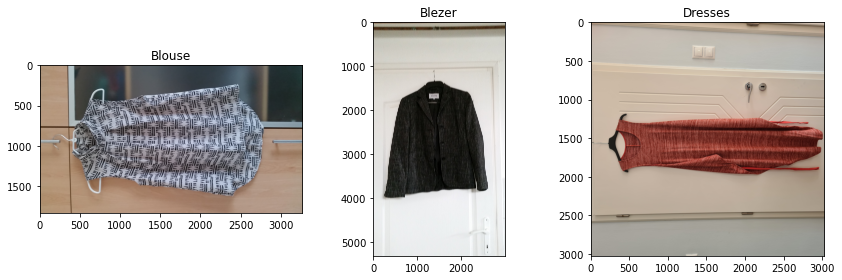

In [38]:
# TEMP Step 3 - Define showOutfit to  Visualise 1 outfit from the randomly generated outfits

import matplotlib.pyplot as plt
import numpy as np

def showOutfit(df, columns, nr_outfit_items, random_index):

    # Create a figure with subplots
    fig, axes = plt.subplots(1,nr_outfit_items, figsize=(12, 4)) #nr_outfit_items
    
    for index, column in enumerate(columns):
        print(f"Index: {index}, Value: {column}")
        path_to_img = os.path.join(path, 'img', column, df[column][random_index])
        img = plt.imread(path_to_img)
        axes[index].imshow(img, origin='upper')
        axes[index].set_title(column)
       
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Display the figure
    plt.show()

outfits= ['Blouse', 'Blezer', 'Dresses'] #
random_index= 0

showOutfit(df_random_outfits, outfits, len(outfits), random_index)

In [ ]:
# Using Widgets

In [44]:
# Step 3 - Visualise 1 outfit from the randomly generated outfits

import ipywidgets as widgets

from IPython.display import display
from IPython.display import clear_output

outfits= ['Blouse', 'Blezer', 'Dresses']
nr_rows = 15 

columns = widgets.SelectMultiple(
    options=outfits,
    description='Outfits:',
    disabled=False,
)

samples = widgets.IntText(
    value=1,
    description='Number of samples:',
    disabled=False
)

likeitCheckbox = widgets.Checkbox(
    value=False,
    description='Like it',
    disabled=False,
    indent=False
)

box = widgets.Box(children=[columns, samples, likeitCheckbox])
out = widgets.Output()

# Define the event handler function
def on_value_change(change):
    with out:
        clear_output()
        # optional random generation - can be omitted
        #df_random_outfits = randomDf(df, nr_rows, outfits)
        random_index= random_int = random.randint(0, len(df_random_outfits)-1) # display randomly a row from randomly generated outfit df
        display(df_random_outfits[outfits][list(columns.value)].iloc[random_index])
        display(showOutfit(df_random_outfits, list(columns.value), max(2, len(list(columns.value))), random_index))
        
        result = df_random_outfits[outfits][list(columns.value)].sample(samples.value)
    return result
# observers
columns.observe(on_value_change, names='value')
samples.observe(on_value_change, names='value')

# Define the event handler function
def checkbox_event_handler(change):
    if change['new']:
        print("Checkbox is checked")
    else:
        print("Checkbox is unchecked")

# observers
likeitCheckbox.observe(checkbox_event_handler, names='value')

display(box, out)

6


Box(children=(SelectMultiple(description='Outfits:', options=('Blouse', 'Blezer', 'Dresses'), value=()), IntTe…

Output()

In [29]:
# Add a likeit value to the outfit df
print("Like it: " + str(random_index) + " "+ str(likeitCheckbox.value))
df_random_outfits.loc[[random_index], "likeit"] = True

#indexes = np.where(np.isnan(df[column]))[0]

Like it: 2 False


In [30]:
df_random_outfits

,Blouse,Blezer,Dresses,likeit
0,20150919_162311.jpg,20150919_184008.jpg,20220629_185554.jpg,False
1,20150919_162311.jpg,20150919_185149.jpg,20150919_163517.jpg,False
2,20150919_162444.jpg,20150919_183542.jpg,20150919_162032.jpg,True
3,20150919_162444.jpg,20150919_184249.jpg,20220629_185148.jpg,False
4,20150919_162311.jpg,20170309_122003.jpg,20220629_185148.jpg,False


In [ ]:
# Miscellous

In [2]:
import os
import csv

path = os.path.abspath(os.getcwd())
path_to_img = os.path.join(path, 'img/Blezer')  # Replace with the path to your folder
file = 'output.csv'

# Get all file names in the folder
file_names = os.listdir(path_to_img)

# Create a CSV file and write the file names
csv_file_path = os.path.join(path, 'data', file)  # Replace with the path to your desired CSV file

with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['File Name'])  # Write header row
    
    for file_name in file_names:
        writer.writerow([file_name])
        
print(f"CSV file '{csv_file_path}' created successfully.")

CSV file 'C:\Users\Victus\source\datascience\Fashion\data\output.csv' created successfully.


In [3]:
import os
import csv

folder_path = os.path.join(path, 'img')  # Replace with the path to your main folder
csv_file_path = csv_file_path = os.path.join(path, 'data', file)  # Replace with the path to your desired CSV file
file = 'output_rec.csv'

def get_file_names_recursive(folder_path):
    file_names = []
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_names.append(os.path.join(root, file))
    
    return file_names

# Get all file names recursively from the folder
file_names = get_file_names_recursive(folder_path)

# Create a CSV file and write the file names
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['File Name'])  # Write header row
    
    for file_name in file_names:
        writer.writerow([file_name])
        
print(f"CSV file '{csv_file_path}' created successfully.")

CSV file 'C:\Users\Victus\source\datascience\Fashion\data\output.csv' created successfully.


CSV file 'C:\Users\Victus\source\datascience\Fashion\data\output_cols.csv' created successfully.


In [68]:
df.columns

Index(['Blezer', 'Blouse', 'Dresses'], dtype='object')

In [ ]:
def showOutfit(image, column, title='column'):
    path_to_img = os.path.join(path, 'img\Blezer', df.Blezer[1])
    img = plt.imread(path_to_img)
    axes[0].imshow(img, origin='upper')
    axes[0].set_title('Blezer')

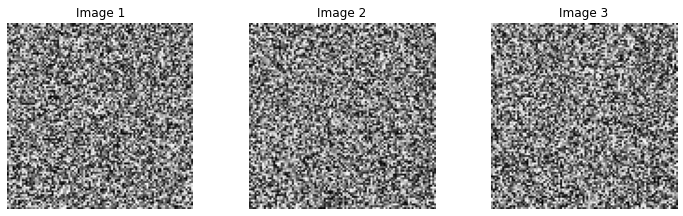

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample images
image1 = np.random.rand(100, 100)
image2 = np.random.rand(100, 100)
image3 = np.random.rand(100, 100)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Adjust the aspect ratio of subplots to match the image size
aspect_ratio = image1.shape[1] / image1.shape[0]  # Width / Height
fig.subplots_adjust(wspace=0.3)  # Adjust the spacing between subplots

axes[0].imshow(image1, cmap='gray', aspect=aspect_ratio)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(image2, cmap='gray', aspect=aspect_ratio)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap='gray', aspect=aspect_ratio)
axes[2].set_title('Image 3')
axes[2].axis('off')

# Display the figure
plt.show()

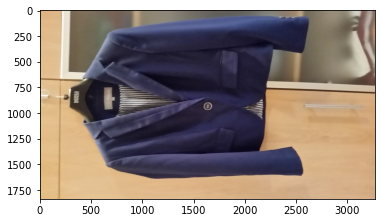

In [51]:
plt.imshow(img)

In [33]:
my_list = ['apple', 'banana', 'orange']

for index, value in enumerate(my_list):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: apple
Index: 1, Value: banana
Index: 2, Value: orange


In [ ]:
# Visualise an outfit

import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image on a separate subplot
path_to_img = os.path.join(path, 'img\Blezer', df.Blezer[1])
img = plt.imread(path_to_img)
axes[0].imshow(img, origin='upper')
axes[0].set_title('Blezer')

path_to_img = os.path.join(path, 'img\Blouse', df.Blouse[1])
img = plt.imread(path_to_img)
axes[1].imshow(img, origin='lower')
axes[1].set_title('Blouse')

path_to_img = os.path.join(path, 'img\Dresses', df.Dresses[1])
img = plt.imread(path_to_img)
axes[2].imshow(img)
axes[2].set_title('Dress')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
# Step 2 - create a df from random outfits

import pandas as pd
import numpy as np

path = os.path.abspath(os.getcwd())
out_file = 'output_cols.csv'
path_to_file = os.path.join(path, 'data', out_file)

df = pd.read_csv(path_to_file)

# Define the number of rows in the DataFrame
num_rows = 10

mylist = list(set(df.Blouse.tolist()))
#clean_array = my_array[~np.isnan(my_array)]
mylist = df.Blouse[~pd.isna(df.Blouse)]
pd.isna

# Create random data for each column
blezer = np.random.choice(df.Blezer[~pd.isna(df.Blezer)], size=8, replace=True)  # Random integers between 0 and 100
blouse = np.random.choice(df.Blouse[~pd.isna(df.Blouse)], size=8, replace=True)  # Random floats between 0.0 and 1.0
dresses = np.random.choice(df.Dresses[~pd.isna(df.Dresses)], size=8, replace=True)  # Random choice from a list

# Create the DataFrame
data = {
    'Blezer': blezer,
    'Blouse': blouse,
    'Dresses': dresses
}

df_random_outfit = pd.DataFrame(data)

# Print the DataFrame
print(df_random_outfit)


In [ ]:
import ipywidgets as widgets

from IPython.display import display
from IPython.display import clear_output

outfits= ['Blouse', 'Blezer', 'Dresses']
nr_rows= 12 # nr of rows to generate

button = widgets.Button(description="Click Me!")
out = widgets.Output()

box = widgets.Box(children=[button])

def on_button_clicked(button):
    with out:
        clear_output()
        display("Button clicked.")
        df_random = randomDf(df, nr_rows, outfits)
        display(df_random)
    return df_random   
        

button.on_click(on_button_clicked)

display(box, out)

In [156]:
import pandas as pd
import ipywidgets as widgets

# Create a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(data)

# Create a dropdown widget
dropdown = widgets.Dropdown(options=['Option 1', 'Option 2', 'Option 3'],
                            description='Select an option')

# Event handler function
def dropdown_event_handler(change):
    selected_option = change['new']
    
    # Perform some operation based on the selected option
    if selected_option == 'Option 1':
        # Return the original DataFrame
        return df
    elif selected_option == 'Option 2':
        # Perform some transformation on the DataFrame
        # Return the transformed DataFrame
        transformed_df = df.copy()
        transformed_df['Age'] += 5
        return transformed_df
    else:
        # Return an empty DataFrame
        return pd.DataFrame()

# Attach the event handler function to the dropdown
dropdown.observe(dropdown_event_handler, names='value')

# Display the dropdown widget
display(dropdown)

Dropdown(description='Select an option', options=('Option 1', 'Option 2', 'Option 3'), value='Option 1')

In [159]:
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
